## Importing the necessary libraries of python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing dataset

In [2]:
df = pd.read_csv("C:/Users/Dell laptop/Desktop/Rubix Project 2/Project 3 3classes.csv",header=0)

## Data Preprocessing 

In [ ]:
## Seeing the first 5 rows of the dataset to see the number of columns and other information
df.head()

In [ ]:
## To see the datatype of each feature 
df.info()

In [ ]:
## To see the additional features of the dataset and detect possible columns that have outliers
df.describe()

In [3]:
## Retaining only those rows of Sales where there are no NA values
df2 = df[df['Sales'].notna()]

In [4]:
## Checking the percentage of all NA values present in the dataset
(df2.isna().sum())/df2.shape[0]*100

Company Name                                 0.000000
Year                                         0.000000
Normalized Rating                            0.000000
Ratings                                      0.000000
Sales                                        0.000000
GP Margin %                                  0.000000
PBDIT Margin %                               0.000000
PAT Margin %                                 0.000000
PBT Percentage %                             0.000000
Quick ratio (times)                          0.137725
Current ratio (times)                        0.137725
Debt to equity ratio (times)                 3.971078
Interest cover (times)                      11.947664
Raw material cycle (days)                   25.616894
WIP cycle (days)                            39.837025
Finished goods cycle (days)                 25.479169
Inventory Days                              13.829909
Debtor days (days)                           4.613795
Gross working capital cycle 

### Deleting those columns which have more than 20% of NA values

In [5]:
del df2['WIP cycle (days)']

In [6]:
del df2['Raw material cycle (days)']

In [7]:
del df2['Finished goods cycle (days)']

In [8]:
## Checking the columns again after deleting the above columns.
df2.head()

,Company Name,Year,Normalized Rating,Ratings,Sales,GP Margin %,PBDIT Margin %,PAT Margin %,PBT Percentage %,Quick ratio (times),...,Creditor days (days),Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / GFA,Sales / net fixed Assets,Debt/EBIT,Total Outside liability/ Total Net Worth,Return on net worth,Return on total assets
0,A B I-Showatech (India) Ltd.,2009,1,A1,1481.6,41.85,22.79,10.93,12.90,0.85,...,98.0,36.0,1.15,12.79,1.05,2.20,0.47,1.38,17.63,12.13
2,A L P Nishikawa Co. Pvt. Ltd.,2009,2,A4,914.1,32.43,9.15,1.60,4.99,0.44,...,NaN,NaN,1.13,13.28,1.34,2.70,3.22,3.15,NaN,NaN
3,A M C L Machinery Ltd.,2009,1,A1,710.8,40.18,23.45,20.33,20.85,0.90,...,36.0,149.0,1.09,24.60,2.99,17.64,0.47,4.48,78.35,14.02
4,A T C Telecom Infrastructure Pvt. Ltd.,2009,1,A1,8195.2,58.66,24.18,-27.62,-7.02,0.40,...,292.0,-199.0,0.24,33.10,0.31,0.35,10.73,9.03,-128.95,-9.40
5,A V T Mccormick Ingredients Pvt. Ltd.,2009,1,A2,1660.5,32.32,19.72,6.19,19.09,0.45,...,28.0,254.0,1.41,19.53,4.07,18.13,1.87,3.03,17.72,5.92


In [9]:
## Checking the percentage of NA values again
(df2.isna().sum())/df2.shape[0]*100

Company Name                                 0.000000
Year                                         0.000000
Normalized Rating                            0.000000
Ratings                                      0.000000
Sales                                        0.000000
GP Margin %                                  0.000000
PBDIT Margin %                               0.000000
PAT Margin %                                 0.000000
PBT Percentage %                             0.000000
Quick ratio (times)                          0.137725
Current ratio (times)                        0.137725
Debt to equity ratio (times)                 3.971078
Interest cover (times)                      11.947664
Inventory Days                              13.829909
Debtor days (days)                           4.613795
Gross working capital cycle (days)           4.338345
Creditor days (days)                         5.336853
Net working capital cycle (days)             3.948123
Total Income/Total asset    

In [10]:
## COnverting sales to log to avoid skewness.
df2.Sales = np.log(1+df2.Sales)

C:\Users\Dell laptop\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


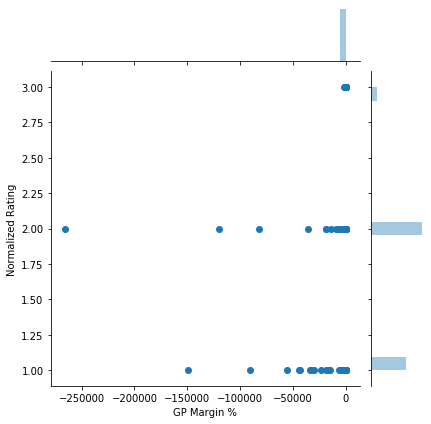

In [11]:
## Plotting scatter plot graph for all the columns to see the possible outliers.
sns.jointplot(x='GP Margin %', y='Normalized Rating', data=df2)

### Capping all the outlier values of each column to either the 5th percentile or the 95th percentile of the respective columns.

In [12]:
print(df2['Sales'].quantile(0.05))
print(df2['Sales'].quantile(0.95))

5.467469227902784
10.944037156954543


In [13]:
df2['Sales'] = np.where(df2['Sales'] <5.467, 5.467,df2['Sales'])
df2['Sales'] = np.where(df2['Sales'] >10.944, 10.944,df2['Sales'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
print(df2['GP Margin %'].quantile(0.05))
print(df2['GP Margin %'].quantile(0.95))

5.1240000000000006
98.62


In [15]:
df2['GP Margin %'] = np.where(df2['GP Margin %'] <5.12, 5.12,df2['GP Margin %'])
df2['GP Margin %'] = np.where(df2['GP Margin %'] >98.62, 98.62,df2['GP Margin %'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
print(df2['PBDIT Margin %'].quantile(0.05))
print(df2['PBDIT Margin %'].quantile(0.95))

-0.8919999999999993
54.835999999999956


In [17]:
df2['PBDIT Margin %'] = np.where(df2['PBDIT Margin %'] <-0.892, -0.892,df2['PBDIT Margin %'])
df2['PBDIT Margin %'] = np.where(df2['PBDIT Margin %'] >54.836, 54.836,df2['PBDIT Margin %'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
print(df2['PAT Margin %'].quantile(0.05))
print(df2['PAT Margin %'].quantile(0.95))

-23.971999999999998
24.663999999999998


In [19]:
df2['PAT Margin %'] = np.where(df2['PAT Margin %'] <-23.972, -23.972,df2['PAT Margin %'])
df2['PAT Margin %'] = np.where(df2['PAT Margin %'] >24.664, 24.664,df2['PAT Margin %'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
print(df2['PBT Percentage %'].quantile(0.05))
print(df2['PBT Percentage %'].quantile(0.95))

-7.531999999999999
39.53


In [21]:
df2['PBT Percentage %'] = np.where(df2['PBT Percentage %'] <-7.532, -7.532,df2['PBT Percentage %'])
df2['PBT Percentage %'] = np.where(df2['PBT Percentage %'] >39.53, 39.53,df2['PBT Percentage %'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
print(df2['Quick ratio (times)'].quantile(0.05))
print(df2['Quick ratio (times)'].quantile(0.95))

0.12
2.04


In [23]:
df2['Quick ratio (times)'] = np.where(df2['Quick ratio (times)'] <0.12, 0.12,df2['Quick ratio (times)'])
df2['Quick ratio (times)'] = np.where(df2['Quick ratio (times)'] >2.04, 2.04,df2['Quick ratio (times)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
print(df2['Current ratio (times)'].quantile(0.05))
print(df2['Current ratio (times)'].quantile(0.95))

0.41
2.83


In [25]:
df2['Current ratio (times)'] = np.where(df2['Current ratio (times)'] <0.41, 0.41,df2['Current ratio (times)'])
df2['Current ratio (times)'] = np.where(df2['Current ratio (times)'] >2.83, 2.83,df2['Current ratio (times)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
print(df2['Debt to equity ratio (times)'].quantile(0.05))
print(df2['Debt to equity ratio (times)'].quantile(0.95))

0.01
6.236999999999998


In [27]:
df2['Debt to equity ratio (times)'] = np.where(df2['Debt to equity ratio (times)'] <0.01, 0.01,df2['Debt to equity ratio (times)'])
df2['Debt to equity ratio (times)'] = np.where(df2['Debt to equity ratio (times)'] >6.237, 6.237,df2['Debt to equity ratio (times)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
print(df2['Interest cover (times)'].quantile(0.05))
print(df2['Interest cover (times)'].quantile(0.95))

0.5755000000000001
57.811499999999995


In [29]:
df2['Interest cover (times)'] = np.where(df2['Interest cover (times)'] <0.575, 0.575,df2['Interest cover (times)'])
df2['Interest cover (times)'] = np.where(df2['Interest cover (times)'] >57.812, 57.812,df2['Interest cover (times)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
print(df2['Inventory Days'].quantile(0.05))
print(df2['Inventory Days'].quantile(0.95))

15.0
503.64999999999964


In [31]:
df2['Inventory Days'] = np.where(df2['Inventory Days'] <15.0, 15.0,df2['Inventory Days'])
df2['Inventory Days'] = np.where(df2['Inventory Days'] >503.649, 503.649,df2['Inventory Days'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
print(df2['Debtor days (days)'].quantile(0.05))
print(df2['Debtor days (days)'].quantile(0.95))

8.0
223.0


In [33]:
df2['Debtor days (days)'] = np.where(df2['Debtor days (days)'] <8.0, 8.0,df2['Debtor days (days)'])
df2['Debtor days (days)'] = np.where(df2['Debtor days (days)'] >223.0, 223.0,df2['Debtor days (days)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
print(df2['Gross working capital cycle (days)'].quantile(0.05))
print(df2['Gross working capital cycle (days)'].quantile(0.95))

37.0
748.0


In [35]:
df2['Gross working capital cycle (days)'] = np.where(df2['Gross working capital cycle (days)'] <37.0, 37.0,df2['Gross working capital cycle (days)'])
df2['Gross working capital cycle (days)'] = np.where(df2['Gross working capital cycle (days)'] >748.0, 748.0,df2['Gross working capital cycle (days)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
print(df2['Creditor days (days)'].quantile(0.05))
print(df2['Creditor days (days)'].quantile(0.95))

8.0
534.5999999999985


In [37]:
df2['Creditor days (days)'] = np.where(df2['Creditor days (days)'] <8.0, 8.0,df2['Creditor days (days)'])
df2['Creditor days (days)'] = np.where(df2['Creditor days (days)'] >534.56, 534.56,df2['Creditor days (days)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
print(df2['Net working capital cycle (days)'].quantile(0.05))
print(df2['Net working capital cycle (days)'].quantile(0.95))

-185.0
493.1999999999989


In [39]:
df2['Net working capital cycle (days)'] = np.where(df2['Net working capital cycle (days)'] <-185.0, -185.0,df2['Net working capital cycle (days)'])
df2['Net working capital cycle (days)'] = np.where(df2['Net working capital cycle (days)'] >439.12, 439.12,df2['Net working capital cycle (days)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
print(df2['Total Income/Total asset'].quantile(0.05))
print(df2['Total Income/Total asset'].quantile(0.95))

0.12
3.35


In [41]:
df2['Total Income/Total asset'] = np.where(df2['Total Income/Total asset'] <0.12, 0.12,df2['Total Income/Total asset'])
df2['Total Income/Total asset'] = np.where(df2['Total Income/Total asset'] >3.35, 3.35,df2['Total Income/Total asset'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
print(df2['Total Income/ Compansation to employees'].quantile(0.05))
print(df2['Total Income/ Compansation to employees'].quantile(0.95))

2.7545
212.09349999999986


In [43]:
df2['Total Income/ Compansation to employees'] = np.where(df2['Total Income/ Compansation to employees'] <2.7545, 2.7545,df2['Total Income/ Compansation to employees'])
df2['Total Income/ Compansation to employees'] = np.where(df2['Total Income/ Compansation to employees'] >212.094, 212.094,df2['Total Income/ Compansation to employees'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
print(df2['Sales / GFA'].quantile(0.05))
print(df2['Sales / GFA'].quantile(0.95))

0.27
42.55700000000001


In [45]:
df2['Sales / GFA'] = np.where(df2['Sales / GFA'] <0.27, 0.27,df2['Sales / GFA'])
df2['Sales / GFA'] = np.where(df2['Sales / GFA'] >42.557, 42.557,df2['Sales / GFA'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
print(df2['Sales / net fixed Assets'].quantile(0.05))
print(df2['Sales / net fixed Assets'].quantile(0.95))

0.34
76.53600000000004


In [47]:
df2['Sales / net fixed Assets'] = np.where(df2['Sales / net fixed Assets'] <0.34, 0.34,df2['Sales / net fixed Assets'])
df2['Sales / net fixed Assets'] = np.where(df2['Sales / net fixed Assets'] >76.536, 76.536,df2['Sales / net fixed Assets'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
print(df2['Debt/EBIT'].quantile(0.05))
print(df2['Debt/EBIT'].quantile(0.95))

0.0
13.73


In [49]:
df2['Debt/EBIT'] = np.where(df2['Debt/EBIT'] <0.0, 0.0,df2['Debt/EBIT'])
df2['Debt/EBIT'] = np.where(df2['Debt/EBIT'] >13.73, 13.73,df2['Debt/EBIT'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
print(df2['Total Outside liability/ Total Net Worth'].quantile(0.05))
print(df2['Total Outside liability/ Total Net Worth'].quantile(0.95))

1.16
10.97


In [51]:
df2['Total Outside liability/ Total Net Worth'] = np.where(df2['Total Outside liability/ Total Net Worth'] <1.16, 1.16,df2['Total Outside liability/ Total Net Worth'])
df2['Total Outside liability/ Total Net Worth'] = np.where(df2['Total Outside liability/ Total Net Worth'] >10.97, 10.97,df2['Total Outside liability/ Total Net Worth'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
print(df2['Return on net worth'].quantile(0.05))
print(df2['Return on net worth'].quantile(0.95))

-37.534
36.45399999999998


In [53]:
df2['Return on net worth'] = np.where(df2['Return on net worth'] <-37.534, -37.534,df2['Return on net worth'])
df2['Return on net worth'] = np.where(df2['Return on net worth'] >36.454, 36.454,df2['Return on net worth'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
print(df2['Return on total assets'].quantile(0.05))
print(df2['Return on total assets'].quantile(0.95))

-9.62
14.013999999999996


In [55]:
df2['Return on total assets'] = np.where(df2['Return on total assets'] <-9.62, -9.62,df2['Return on total assets'])
df2['Return on total assets'] = np.where(df2['Return on total assets'] >14.014, 14.014,df2['Return on total assets'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Imputing the missing values with KNN algorithm for all the columns that has missing values

In [56]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df2_filled = imputer.fit_transform(df2[['Quick ratio (times)']])
df2['Quick ratio (times)']=df2_filled

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [57]:
imputer2 = KNNImputer(n_neighbors=2)
df2_filled2 = imputer2.fit_transform(df2[['Current ratio (times)']])
df2['Current ratio (times)']=df2_filled2

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
imputer3 = KNNImputer(n_neighbors=2)
df2_filled3 = imputer3.fit_transform(df2[['Debt to equity ratio (times)']])
df2['Debt to equity ratio (times)']=df2_filled3

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
imputer4 = KNNImputer(n_neighbors=2)
df2_filled4 = imputer4.fit_transform(df2[['Interest cover (times)']])
df2['Interest cover (times)']=df2_filled4

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
imputer5 = KNNImputer(n_neighbors=2)
df2_filled5 = imputer5.fit_transform(df2[['Inventory Days']])
df2['Inventory Days']=df2_filled5

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
imputer6 = KNNImputer(n_neighbors=2)
df2_filled6 = imputer6.fit_transform(df2[['Debtor days (days)']])
df2['Debtor days (days)']=df2_filled6

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
imputer7 = KNNImputer(n_neighbors=2)
df2_filled7 = imputer7.fit_transform(df2[['Gross working capital cycle (days)']])
df2['Gross working capital cycle (days)']=df2_filled7

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
imputer8 = KNNImputer(n_neighbors=2)
df2_filled8 = imputer8.fit_transform(df2[['Creditor days (days)']])
df2['Creditor days (days)']=df2_filled8

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
imputer9 = KNNImputer(n_neighbors=2)
df2_filled9 = imputer9.fit_transform(df2[['Net working capital cycle (days)']])
df2['Net working capital cycle (days)']=df2_filled9

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
imputer10 = KNNImputer(n_neighbors=2)
df2_filled10 = imputer10.fit_transform(df2[['Total Income/ Compansation to employees']])
df2['Total Income/ Compansation to employees']=df2_filled10

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
imputer11 = KNNImputer(n_neighbors=2)
df2_filled11 = imputer11.fit_transform(df2[['Sales / GFA']])
df2['Sales / GFA']=df2_filled11

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
imputer12 = KNNImputer(n_neighbors=2)
df2_filled12 = imputer12.fit_transform(df2[['Sales / net fixed Assets']])
df2['Sales / net fixed Assets']=df2_filled12

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
imputer13 = KNNImputer(n_neighbors=2)
df2_filled13 = imputer13.fit_transform(df2[['Debt/EBIT']])
df2['Debt/EBIT']=df2_filled13

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
imputer14 = KNNImputer(n_neighbors=2)
df2_filled14 = imputer14.fit_transform(df2[['Return on net worth']])
df2['Return on net worth']=df2_filled14

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
imputer15 = KNNImputer(n_neighbors=2)
df2_filled15 = imputer15.fit_transform(df2[['Return on total assets']])
df2['Return on total assets']=df2_filled15

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
## Now checking the percentage to see if NA values were replaced successfully.
(df2.isna().sum())/df2.shape[0]*100

Company Name                                0.0
Year                                        0.0
Normalized Rating                           0.0
Ratings                                     0.0
Sales                                       0.0
GP Margin %                                 0.0
PBDIT Margin %                              0.0
PAT Margin %                                0.0
PBT Percentage %                            0.0
Quick ratio (times)                         0.0
Current ratio (times)                       0.0
Debt to equity ratio (times)                0.0
Interest cover (times)                      0.0
Inventory Days                              0.0
Debtor days (days)                          0.0
Gross working capital cycle (days)          0.0
Creditor days (days)                        0.0
Net working capital cycle (days)            0.0
Total Income/Total asset                    0.0
Total Income/ Compansation to employees     0.0
Sales / GFA                             

In [72]:
## Checking the number of rows and columns
df2.shape

(8713, 26)

### Checking the correlation matrix

In [73]:
pd.set_option('display.max_columns', None)
df2.corr()

,Year,Normalized Rating,Sales,GP Margin %,PBDIT Margin %,PAT Margin %,PBT Percentage %,Quick ratio (times),Current ratio (times),Debt to equity ratio (times),Interest cover (times),Inventory Days,Debtor days (days),Gross working capital cycle (days),Creditor days (days),Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / GFA,Sales / net fixed Assets,Debt/EBIT,Total Outside liability/ Total Net Worth,Return on net worth,Return on total assets
Year,1.000000,-0.043782,0.103758,0.005742,-0.018117,-0.031665,-0.034088,0.043023,0.059818,-0.050102,0.049563,-0.013585,0.037590,-0.000990,0.059569,-0.045062,0.011207,-0.064165,0.029754,0.035449,-0.061552,-0.041371,-0.030018,-0.014183
Normalized Rating,-0.043782,1.000000,-0.395980,-0.082965,-0.196546,-0.368856,-0.243530,-0.209287,-0.150658,0.291091,-0.300234,0.080953,0.111270,0.125466,0.014358,0.123903,0.019701,0.127262,0.052896,0.057988,0.231393,0.219961,-0.250464,-0.363595
Sales,0.103758,-0.395980,1.000000,0.087705,-0.078194,0.141623,-0.006552,-0.005267,-0.045629,-0.112528,0.146072,-0.117804,-0.192550,-0.180909,-0.167109,-0.063997,0.167796,0.129031,0.094202,0.066564,-0.105101,-0.027327,0.159277,0.192525
GP Margin %,0.005742,-0.082965,0.087705,1.000000,0.212426,0.100307,0.193527,0.161870,0.047829,-0.029299,0.038979,0.143903,0.042809,0.063269,0.077925,-0.006695,0.023456,0.131383,0.315193,0.314919,0.005008,0.012989,0.060381,0.074164
PBDIT Margin %,-0.018117,-0.196546,-0.078194,0.212426,1.000000,0.519429,0.916186,0.144180,0.073092,-0.015989,0.144599,0.250586,0.160380,0.263666,0.302712,0.033967,-0.536533,-0.233054,-0.267279,-0.255886,0.018922,-0.080788,0.157640,0.246608
PAT Margin %,-0.031665,-0.368856,0.141623,0.100307,0.519429,1.000000,0.720987,0.322461,0.323103,-0.341643,0.335894,-0.038660,-0.053817,-0.048385,-0.043659,-0.019665,-0.026529,-0.090661,-0.026410,-0.025661,-0.253476,-0.257246,0.611742,0.747581
PBT Percentage %,-0.034088,-0.243530,-0.006552,0.193527,0.916186,0.720987,1.000000,0.194368,0.160508,-0.092648,0.197503,0.198898,0.110798,0.208459,0.202503,0.052944,-0.403236,-0.176616,-0.170840,-0.164046,-0.044427,-0.114089,0.335764,0.445352
Quick ratio (times),0.043023,-0.209287,-0.005267,0.161870,0.144180,0.322461,0.194368,1.000000,0.797940,-0.346133,0.403157,-0.157928,0.285848,-0.043828,0.057128,-0.066690,0.014123,-0.009944,0.084314,0.099990,-0.254765,-0.297624,0.186021,0.336424
Current ratio (times),0.059818,-0.150658,-0.045629,0.047829,0.073092,0.323103,0.160508,0.797940,1.000000,-0.326251,0.369629,0.022288,0.111503,0.047939,-0.075191,0.129586,0.068151,0.020179,0.082774,0.097034,-0.212629,-0.304387,0.194480,0.354330
Debt to equity ratio (times),-0.050102,0.291091,-0.112528,-0.029299,-0.015989,-0.341643,-0.092648,-0.346133,-0.326251,1.000000,-0.316244,0.089021,-0.034287,0.072003,0.005532,0.064205,-0.058871,0.129587,0.009703,-0.006945,0.579434,0.862367,-0.305783,-0.393746


In [74]:
## Deleting PBT Percentage % because the correlation coefficient with PAT was around 0.8
del df2['PBT Percentage %']

In [75]:
## Deleting PAT Margin % because the correlation coefficient with PBDIT was around 0.8.  
del df2['PAT Margin %']

In [76]:
## Deleting Gross working capital column because the correlation coefficient with Inventory Days was around 0.8
del df2['Gross working capital cycle (days)']

In [77]:
## Deleting Inventory, creditor, debtor days because the variable Net working capital gives all the required information of these 3 variables.
del df2['Inventory Days']

In [78]:
del df2['Debtor days (days)']

In [79]:
del df2['Creditor days (days)']

In [80]:
## Total outside liability/Total Net worth had correlation of more than 0.8 with Debt to equity ratio so removed this vairable due to business knowledge.
del df2['Total Outside liability/ Total Net Worth']

In [81]:
## Quick ratio and current ratio had correlation of around 0.8 so removed quick ratio as its coefficinet with Deafult variable is less than current ratio.
del df2['Quick ratio (times)']

In [82]:
## Deleting Sales/GFA because it was correlated with Sales net fixed assets. 
del df2['Sales / GFA']

In [83]:
## Deleting Return on net worth because it was correlated with return on total assets
del df2['Return on net worth']

In [84]:
## Checking correlation of all variables again to see if the variables are still correlated.
pd.set_option('display.max_columns', None)
df2.corr()

,Year,Normalized Rating,Sales,GP Margin %,PBDIT Margin %,Current ratio (times),Debt to equity ratio (times),Interest cover (times),Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / net fixed Assets,Debt/EBIT,Return on total assets
Year,1.000000,-0.043782,0.103758,0.005742,-0.018117,0.059818,-0.050102,0.049563,-0.045062,0.011207,-0.064165,0.035449,-0.061552,-0.014183
Normalized Rating,-0.043782,1.000000,-0.395980,-0.082965,-0.196546,-0.150658,0.291091,-0.300234,0.123903,0.019701,0.127262,0.057988,0.231393,-0.363595
Sales,0.103758,-0.395980,1.000000,0.087705,-0.078194,-0.045629,-0.112528,0.146072,-0.063997,0.167796,0.129031,0.066564,-0.105101,0.192525
GP Margin %,0.005742,-0.082965,0.087705,1.000000,0.212426,0.047829,-0.029299,0.038979,-0.006695,0.023456,0.131383,0.314919,0.005008,0.074164
PBDIT Margin %,-0.018117,-0.196546,-0.078194,0.212426,1.000000,0.073092,-0.015989,0.144599,0.033967,-0.536533,-0.233054,-0.255886,0.018922,0.246608
Current ratio (times),0.059818,-0.150658,-0.045629,0.047829,0.073092,1.000000,-0.326251,0.369629,0.129586,0.068151,0.020179,0.097034,-0.212629,0.354330
Debt to equity ratio (times),-0.050102,0.291091,-0.112528,-0.029299,-0.015989,-0.326251,1.000000,-0.316244,0.064205,-0.058871,0.129587,-0.006945,0.579434,-0.393746
Interest cover (times),0.049563,-0.300234,0.146072,0.038979,0.144599,0.369629,-0.316244,1.000000,-0.067142,-0.026450,-0.124234,-0.011397,-0.337332,0.403550
Net working capital cycle (days),-0.045062,0.123903,-0.063997,-0.006695,0.033967,0.129586,0.064205,-0.067142,1.000000,-0.197742,-0.035208,-0.038050,0.098456,-0.082005
Total Income/Total asset,0.011207,0.019701,0.167796,0.023456,-0.536533,0.068151,-0.058871,-0.026450,-0.197742,1.000000,0.440652,0.472922,-0.135925,0.216284


In [85]:
## Deleting because correlation coefficient with sales/net fixed assets was 0.5
del df2['Total Income/ Compansation to employees']

In [86]:
## Deleting because correlation coefficient with debt to equity ratio was around 0.6
del df2['Debt/EBIT']

In [87]:
## Deleting because correlation coefficient with PBDIT was more than 0.5
del df2['Total Income/Total asset']

In [88]:
## Checking the final rows and columns of the dataframe.
df2.shape

(8713, 13)

In [89]:
df2.head()

,Company Name,Year,Normalized Rating,Ratings,Sales,GP Margin %,PBDIT Margin %,Current ratio (times),Debt to equity ratio (times),Interest cover (times),Net working capital cycle (days),Sales / net fixed Assets,Return on total assets
0,A B I-Showatech (India) Ltd.,2009,1,A1,7.301553,41.85,22.79,1.80,0.17,8.710000,36.000000,2.20,12.130000
2,A L P Nishikawa Co. Pvt. Ltd.,2009,2,A4,6.819033,32.43,9.15,0.63,1.05,1.370000,95.266034,2.70,2.940363
3,A M C L Machinery Ltd.,2009,1,A1,6.567797,40.18,23.45,1.32,0.54,57.812000,149.000000,17.64,14.014000
4,A T C Telecom Infrastructure Pvt. Ltd.,2009,1,A1,9.011426,58.66,24.18,0.41,5.54,7.396642,-185.000000,0.35,-9.400000
5,A V T Mccormick Ingredients Pvt. Ltd.,2009,1,A2,7.415476,32.32,19.72,1.34,1.57,3.830000,254.000000,18.13,5.920000


# LOGISTIC REGRESSION MODEL

In [90]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 4:13].values
y = df2.iloc[:, 2].values

In [91]:
print(X)

[[   7.30155258   41.85         22.79       ...   36.
     2.2          12.13      ]
 [   6.81903335   32.43          9.15       ...   95.26603417
     2.7           2.9403634 ]
 [   6.56779697   40.18         23.45       ...  149.
    17.64         14.014     ]
 ...
 [   8.4039573    27.02          5.46       ...   59.
     4.02         13.09      ]
 [   9.53403127   41.25         31.31       ... -185.
     6.87         12.86      ]
 [   5.88081228   63.09         19.07       ...  -74.
     0.34         -1.74      ]]


In [92]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [93]:
## Standardizing all the values so that no column dominates the other columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import statsmodels.api as sm
lm = sm.MNLogit(y_train,sm.add_constant(X_train))
lm
result = lm.fit()
print (result.summary())
print (result.summary2())

In [ ]:
## Importing LogisticRegression class from sklearn library and fitting it on the training set.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, multi_class = 'multinomial')
classifier.fit(X_train, y_train)

In [ ]:
## Predicting the results by using the X_test data.
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
## Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
## Printing the coefficients of Logistic regression model.
print(classifier.coef_)

In [ ]:
## Analysing the importance of each feature.
importance = classifier.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
## Analysing the accuracy by ridge and lasso regression to avoid overfitting of model.
classifier2 = LogisticRegression(C=0.01,penalty='l2',multi_class = 'multinomial')
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
print("Non zero weights : ",np.count_nonzero(classifier.coef_))

In [ ]:
## Importing the confusion matrix and accuracy score.
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

# RANDOM FOREST MODEL

In [ ]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 4:13].values
y = df2.iloc[:, 2].values

In [ ]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
## Standardizing all the values so that no column dominates the other columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Importing RandomForestCLassifier class from sklearn library and fitting it on the training set.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
## Predicting the results by using the X_test data.
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
## Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
## Feature importance
importances = classifier.feature_importances_

In [ ]:
## PLotting the histogram for all the features as per their importance.
std = np.std([classifier.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# XG BOOST

In [ ]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 4:13].values
y = df2.iloc[:, 2].values

In [ ]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
## Since xgboost doesnt need standardisation, directly Importing XBGCLassifier class from sklearn library and fitting it on the training set.
from xgboost import XGBClassifier
classifier = XGBClassifier(learningrate=0.1, objective='multi:softmax', num_class = 4)
classifier.fit(X_train, y_train)

In [ ]:
## Predicting the results and Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# ARTIFICIAL NEURAL NETWORKS (ANN)

In [94]:
##Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [95]:
np.random.seed(42)
tf.random.set_seed(42)

In [109]:
## Setting up the input dimensions for ANN
input_dim = X_train.shape[1]

In [112]:
## Building up the model with 23 input layers and 1 output layer.
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=25088, input_dim=input_dim, activation="relu"))
model.add(keras.layers.Dense(4096, activation="relu"))
model.add(keras.layers.Dense(4096, activation="relu"))
model.add(keras.layers.Dense(1000, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))

In [113]:
## To see the total amaount of parameters.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 25088)             250880    
_________________________________________________________________
dense_25 (Dense)             (None, 4096)              102764544 
_________________________________________________________________
dense_26 (Dense)             (None, 4096)              16781312  
_________________________________________________________________
dense_27 (Dense)             (None, 1000)              4097000   
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 4004      
Total params: 123,897,740
Trainable params: 123,897,740
Non-trainable params: 0
_________________________________________________________________


In [114]:
## Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [115]:
##Training on different epochs
model_history = model.fit(X_train, y_train, epochs=100)

Train on 6534 samples
Epoch 1/10
6534/6534 [==============================] - 495s 76ms/sample - loss: 1.2616 - accuracy: 0.7063
Epoch 2/10
6534/6534 [==============================] - 497s 76ms/sample - loss: 0.6630 - accuracy: 0.7412
Epoch 3/10
6534/6534 [==============================] - 482s 74ms/sample - loss: 0.6441 - accuracy: 0.7446
Epoch 4/10
6534/6534 [==============================] - 482s 74ms/sample - loss: 0.6230 - accuracy: 0.7485
Epoch 5/10
6534/6534 [==============================] - 481s 74ms/sample - loss: 0.6192 - accuracy: 0.7496
Epoch 6/10
6534/6534 [==============================] - 481s 74ms/sample - loss: 0.6068 - accuracy: 0.7577
Epoch 7/10
6534/6534 [==============================] - 482s 74ms/sample - loss: 0.6020 - accuracy: 0.7568
Epoch 8/10
6534/6534 [==============================] - 481s 74ms/sample - loss: 0.5957 - accuracy: 0.7600
Epoch 9/10
6534/6534 [==============================] - 479s 73ms/sample - loss: 0.5879 - accuracy: 0.7596
Epoch 10/10
653

In [116]:
## Information abou different parameters
model_history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 205,
 'samples': 6534,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'accuracy']}

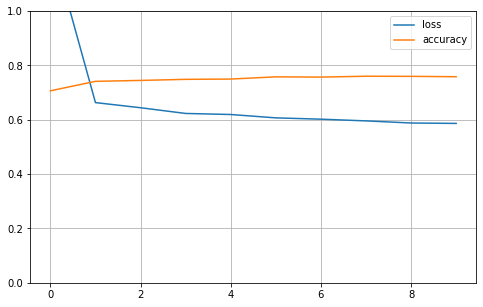

In [117]:
##To see the plot
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [118]:
##Evaluating the model
model.evaluate(X_test, y_test)

2179/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.651417760358813, 0.74988526]

In [ ]:
## Predicting on test data or we can predict on new data too
y_pred = model.predict_classes(X_test)
y_pred

In [ ]:
## Building the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [98]:
## To see different layers of VGG16
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [99]:
base_model = VGG16()

In [100]:
print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# NAIVE BAYES

In [ ]:
## Setting up X and Y variables
X = df2.iloc[:, 4:13].values
y = df2.iloc[:, 2].values

In [ ]:
## Splitting up the data on train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
## Standardizing the variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Importing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
## Predicting on X-test
y_pred = classifier.predict(X_test)

In [ ]:
## Importing confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
##  Importing cross validation and checking accuracy 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))